##### GROUP MEMBERS : Michael Woo, Tom Slawinski,Rahman Mhate,Naga Akhil Desabattina

##### Import Statements

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

##### Read in Data

In [4]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")
train_data.shape, test_data.shape

((1460, 81), (1459, 80))

In [5]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Columns that are not usable we are going to have to drop in the test data 

In [8]:
train_data = train_data.drop('Id',axis=1)

In [9]:
test_data = test_data.drop('Id',axis=1)

In [10]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


##### Lets enconder the string values into numerical values so that the classifer can read in the data and replace the NaN values in the data...We do it for both test and train data

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in train_data.columns:
    #print(col)
    if train_data[col].dtype == "O":
        train_data[col] = train_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])
for col in test_data.columns:
    if test_data[col].dtype == "O":
        test_data[col] = test_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        test_data[col] = le.fit_transform(test_data[col])

##### Label Encoder Check

In [13]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [14]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74.0,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78.0,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43.0,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4


##### Saving the columns names later for the transformation

In [15]:
column_names = train_data.columns
test_col_names = test_data.columns

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  BldgType       1460 non-null   int64  
 15  HouseStyle     1460 non-null   int64  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [17]:
column_names

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

#### Replacing nan values with mean values of that column

In [18]:
from sklearn.impute import SimpleImputer
values = train_data.values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imp.fit_transform(values)
imp.fit(train_data)
train_data= pd.DataFrame(imp.transform(train_data))
train_data = train_data.applymap(np.int64)
train_data.columns = column_names

In [19]:
from sklearn.impute import SimpleImputer
values = test_data.values
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
transformed_values = imp.fit_transform(values)
imp.fit(test_data)
test_data= pd.DataFrame(imp.transform(test_data))
test_data = test_data.applymap(np.int64)
test_data.columns = test_col_names

In [20]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


In [21]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,80,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,9,4
1,20,4,81,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,4,74,13830,1,1,0,3,0,4,...,0,0,2,2,1,0,3,2010,9,4
3,60,4,78,9978,1,1,0,3,0,4,...,0,0,2,4,1,0,6,2010,9,4
4,120,4,43,5005,1,1,0,1,0,4,...,144,0,2,4,1,0,1,2010,9,4


In [22]:
train_old = train_data

In [23]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


## FEATURE SELECTION (Spearman)

### Calculation of Spearman's rank correlation coefficient amongst all the features (columns)

* This is a statistical method of choosing features using the Spearman method. This method assesses how well the relationship between 2 features can be described usiung a montonic function 

<AxesSubplot:>

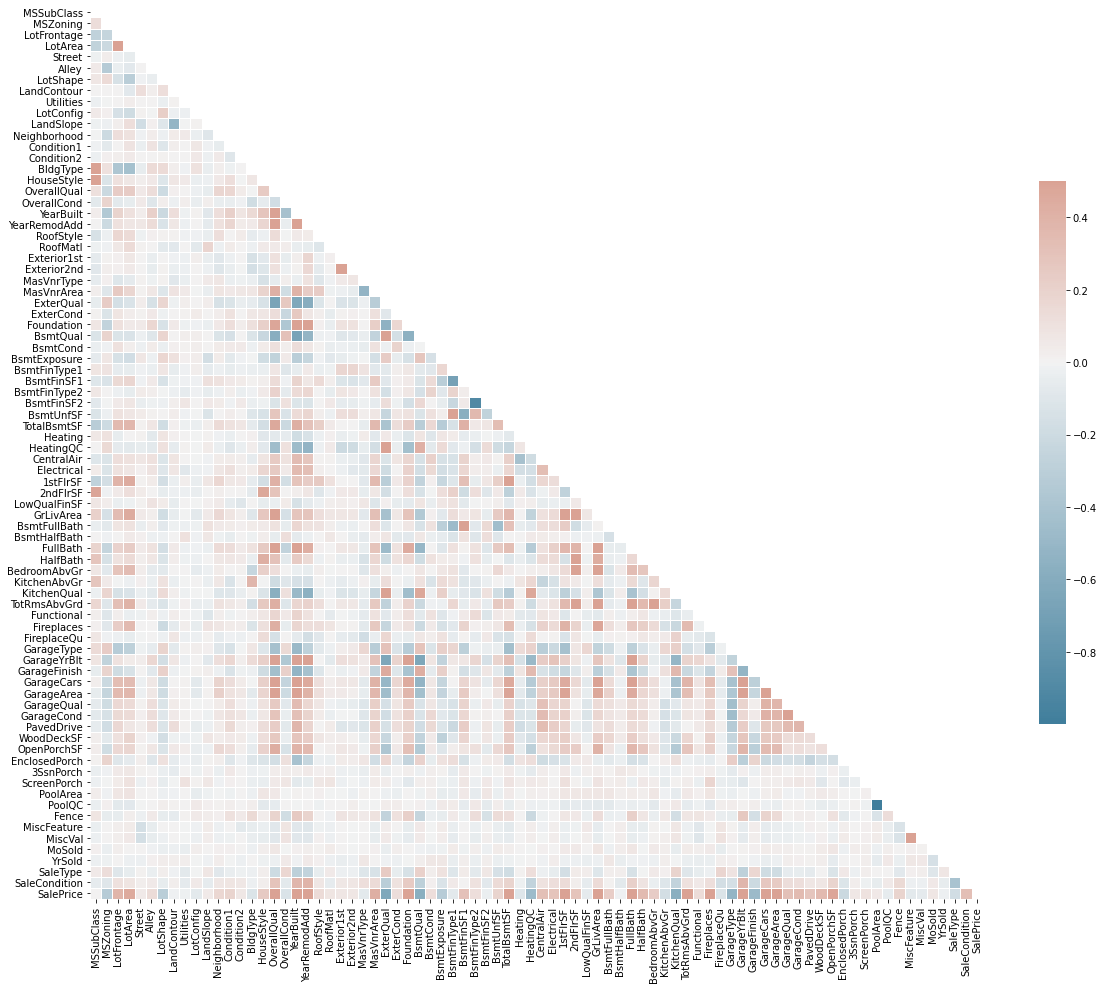

In [24]:
correlation_matrix = train_data.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Only features that have correlation coefficient (with SalePrice) greater than 0.5 are selected as training features

In [25]:
indecies = np.where(correlation_matrix['SalePrice'] > 0.5)
improved_features = correlation_matrix.iloc[indecies].drop('SalePrice')
improved_features['SalePrice']

OverallQual     0.809829
YearBuilt       0.652682
YearRemodAdd    0.571159
TotalBsmtSF     0.602725
1stFlrSF        0.575408
GrLivArea       0.731310
FullBath        0.635957
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
GarageYrBlt     0.566809
GarageCars      0.690711
GarageArea      0.649379
Name: SalePrice, dtype: float64

##### Feature correlation pairs

In [26]:
sol = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
       .stack().sort_values(ascending=False))

<ipython-input-26-126590f45602>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sol = (correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))


In [27]:
sol = sol[sol > 0.65]

In [28]:
sol.head()

MiscFeature  MiscVal        0.902895
Exterior1st  Exterior2nd    0.858487
GarageCars   GarageArea     0.853317
YearBuilt    GarageYrBlt    0.849019
TotalBsmtSF  1stFlrSF       0.829292
dtype: float64

### These new_features are the features we got from the SPEARMAN COEFFICENT

In [29]:
new_features_spearman = list(improved_features.index)
new_features_spearman

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

## FEATURE SELECTION (New Feature Generation)

In [30]:
with_new_ftr_train_data = train_data

with_new_ftr_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,68,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,60,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,84,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


##### KitchenDetails = KitchenAbvGr * KitchenQual
* Since we are dealing with number of kitchen we can multiple it by the quality value to reduce dimmensions

In [31]:
with_new_ftr_train_data = with_new_ftr_train_data.assign(KitchenDetails=with_new_ftr_train_data["KitchenAbvGr"]*with_new_ftr_train_data["KitchenQual"])
test_data = test_data.assign(KitchenDetails=test_data["KitchenAbvGr"]*test_data["KitchenQual"])

###### houseDetails =  (TotalBsmtSF+1stFlrSF+2ndFlrSF+WoodDeckSF+OpenPorchSF+PoolArea+GarageArea+EnclosedPorch+3SsnPorch+ScreenPorch)
* We want the total square footage of the house

In [32]:
with_new_ftr_train_data = with_new_ftr_train_data.assign(houseSize=with_new_ftr_train_data["TotalBsmtSF"]
                                                        +with_new_ftr_train_data["1stFlrSF"]+
                                                        with_new_ftr_train_data["2ndFlrSF"]+
                                                       with_new_ftr_train_data["WoodDeckSF"]+
                                                       with_new_ftr_train_data["OpenPorchSF"]+
                                                       with_new_ftr_train_data["PoolArea"]+
                                                       with_new_ftr_train_data["GarageArea"]+
                                                       with_new_ftr_train_data["EnclosedPorch"]+
                                                       with_new_ftr_train_data["3SsnPorch"]+
                                                       with_new_ftr_train_data["ScreenPorch"])

test_data = test_data.assign(houseSize=test_data["TotalBsmtSF"]
                                                        +test_data["1stFlrSF"]+
                                                        test_data["2ndFlrSF"]+
                                                       test_data["WoodDeckSF"]+
                                                       test_data["OpenPorchSF"]+
                                                       test_data["PoolArea"]+
                                                       test_data["GarageArea"]+
                                                       test_data["EnclosedPorch"]+
                                                       test_data["3SsnPorch"]+
                                                       test_data["ScreenPorch"])


##### GarageDetails = (GarageQual +GarageCond)  * GarageArea
* Since we are dealing with square footage of the garage we can multiple it by the sum of the GarageQual + GarageCond to reduce dimmensions

In [33]:
with_new_ftr_train_data = with_new_ftr_train_data.assign(GarageDetails=(with_new_ftr_train_data["GarageQual"]+with_new_ftr_train_data["GarageCond"])*with_new_ftr_train_data["GarageArea"])
test_data = test_data.assign(GarageDetails=(test_data["GarageQual"]+test_data["GarageCond"])*test_data["GarageArea"])

##### BasementDetails = TotalBsmtSF * BsmtQual
* Since we are dealing with square footage of the basement we can multiple it by the quality value to reduce dimmensions

In [34]:
with_new_ftr_train_data = with_new_ftr_train_data.assign(BasementDetails=with_new_ftr_train_data["TotalBsmtSF"]*with_new_ftr_train_data["BsmtQual"])
test_data = test_data.assign(BasementDetails=test_data["TotalBsmtSF"]*test_data["BsmtQual"])


##### RemoDetails = YearBuilt -YearRemodAdd
* Change from when the house was built to the remodel based on years

In [35]:
with_new_ftr_train_data = with_new_ftr_train_data.assign(RemoDetails=abs(with_new_ftr_train_data["YearBuilt"]-with_new_ftr_train_data["YearRemodAdd"]))
test_data = test_data.assign(RemoDetails=abs(test_data["YearBuilt"]-test_data["YearRemodAdd"]))

##### Making sure that we generated these columns properly

In [36]:
with_new_ftr_train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,KitchenDetails,houseSize,GarageDetails,BasementDetails,RemoDetails
0,60,3,65,8450,1,1,3,3,0,4,...,2,2008,8,4,208500,2,3175,5480,1712,0
1,20,3,80,9600,1,1,3,3,0,2,...,5,2007,8,4,181500,3,3282,4600,2524,0
2,60,3,68,11250,1,1,0,3,0,4,...,9,2008,8,4,223500,2,3356,6080,1840,1
3,70,3,60,9550,1,1,0,3,0,0,...,2,2006,8,0,140000,2,3422,6420,3024,55
4,60,3,84,14260,1,1,0,3,0,2,...,12,2008,8,4,250000,2,4455,8360,2290,0


In [37]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,KitchenDetails,houseSize,GarageDetails,BasementDetails,RemoDetails
0,20,3,80,11622,1,1,3,3,0,4,...,0,6,2010,9,4,4,2768,6570,3528,0
1,20,4,81,14267,1,1,0,3,0,0,...,12500,6,2010,9,4,2,3399,2808,5316,0
2,60,4,74,13830,1,1,0,3,0,4,...,0,3,2010,9,4,4,3285,4338,1856,1
3,60,4,78,9978,1,1,0,3,0,4,...,0,6,2010,9,4,2,3396,4230,3704,0
4,120,4,43,5005,1,1,0,1,0,4,...,0,1,2010,9,4,2,3292,4554,2560,0


In [38]:
with_new_ftr_train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [39]:
new_features_creation = ["KitchenDetails","houseSize","GarageDetails","BasementDetails","RemoDetails"]

In [40]:
train_data = with_new_ftr_train_data

## FEATURE SELECTION (Feature Importance using Random Forest)

In [41]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,KitchenDetails,houseSize,GarageDetails,BasementDetails,RemoDetails
0,60,3,65,8450,1,1,3,3,0,4,...,2,2008,8,4,208500,2,3175,5480,1712,0
1,20,3,80,9600,1,1,3,3,0,2,...,5,2007,8,4,181500,3,3282,4600,2524,0
2,60,3,68,11250,1,1,0,3,0,4,...,9,2008,8,4,223500,2,3356,6080,1840,1
3,70,3,60,9550,1,1,0,3,0,0,...,2,2006,8,0,140000,2,3422,6420,3024,55
4,60,3,84,14260,1,1,0,3,0,2,...,12,2008,8,4,250000,2,4455,8360,2290,0


##### Seperated data values and targeted values

In [42]:
x = train_data.drop(["SalePrice"],axis=1).values

In [43]:
y = train_data["SalePrice"].values

##### Random Forest Feature Selection

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1,max_depth=10)
model.fit(x,y)

RandomForestRegressor(max_depth=10, random_state=1)

In [45]:
train_data.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

In [46]:
model.feature_importances_

array([1.16397751e-03, 1.43090219e-03, 3.97453213e-03, 7.85489047e-03,
       1.18738900e-05, 1.24213391e-04, 5.84161120e-04, 1.40763360e-03,
       3.06942052e-08, 9.50688885e-04, 8.67762640e-04, 7.85305563e-03,
       4.70575009e-04, 5.24192400e-05, 2.14659250e-04, 8.83719966e-04,
       1.51727210e-01, 6.21831035e-03, 2.17182306e-02, 9.13005230e-03,
       4.36524860e-04, 4.56374757e-04, 9.80777461e-04, 1.13551729e-03,
       2.09633028e-03, 3.30716126e-03, 3.37931459e-03, 4.95026765e-04,
       5.04920955e-04, 7.17502757e-03, 1.52984208e-04, 1.56226588e-03,
       8.52243337e-04, 8.89950407e-03, 5.49182892e-04, 2.34633674e-04,
       5.98669046e-03, 4.19947182e-03, 5.08134234e-05, 5.51917519e-04,
       2.10653990e-03, 4.99611021e-05, 3.93614318e-03, 2.57955129e-02,
       2.48676943e-05, 8.23622094e-03, 5.73173596e-04, 7.50540048e-04,
       3.01612616e-03, 7.39852710e-04, 1.50076796e-03, 5.46531601e-04,
       2.45324232e-03, 3.61884920e-03, 6.11012249e-04, 2.44937507e-03,
      

In [47]:
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))

##### Graphing of Feature Importances

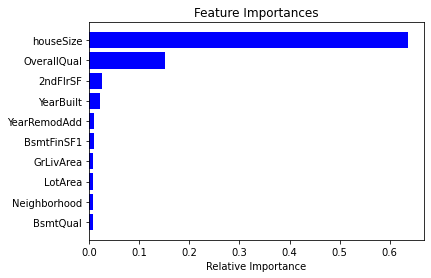

In [48]:
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [49]:
random_for_ftr = [features[i] for i in indices]

## Final Features

##### Spearman

In [50]:
new_features_spearman

['OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

##### Feature Creation

In [51]:
new_features_creation

['KitchenDetails',
 'houseSize',
 'GarageDetails',
 'BasementDetails',
 'RemoDetails']

##### Random Forest Feature Importance

In [52]:
random_for_ftr

['BsmtQual',
 'Neighborhood',
 'LotArea',
 'GrLivArea',
 'BsmtFinSF1',
 'YearRemodAdd',
 'YearBuilt',
 '2ndFlrSF',
 'OverallQual',
 'houseSize']

##### the set of both spearman and random forest feature importance

In [53]:
best_set = new_features_spearman + random_for_ftr 
best_of_both = list(set(best_set))

In [54]:
new_features_creation

['KitchenDetails',
 'houseSize',
 'GarageDetails',
 'BasementDetails',
 'RemoDetails']

In [55]:
best_of_both.append(new_features_creation[1])

In [56]:
best_of_both

['LotArea',
 'BsmtQual',
 '1stFlrSF',
 'FullBath',
 'TotalBsmtSF',
 '2ndFlrSF',
 'YearBuilt',
 'BsmtFinSF1',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'OverallQual',
 'GarageYrBlt',
 'Neighborhood',
 'houseSize',
 'GrLivArea',
 'houseSize']

In [57]:
new_features_creation[0:5:2]

['KitchenDetails', 'GarageDetails', 'RemoDetails']

In [58]:
everything = new_features_spearman + random_for_ftr + new_features_creation
best_everything = list(set(everything))

In [59]:
best_everything

['LotArea',
 'KitchenDetails',
 'YearBuilt',
 'YearRemodAdd',
 'Fireplaces',
 'GarageCars',
 'GarageDetails',
 'BasementDetails',
 'OverallQual',
 '1stFlrSF',
 '2ndFlrSF',
 'TotRmsAbvGrd',
 'houseSize',
 'FullBath',
 'Neighborhood',
 'BsmtQual',
 'TotalBsmtSF',
 'GarageArea',
 'BsmtFinSF1',
 'GarageYrBlt',
 'RemoDetails',
 'GrLivArea']

In [60]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,KitchenDetails,houseSize,GarageDetails,BasementDetails,RemoDetails
0,60,3,65,8450,1,1,3,3,0,4,...,2,2008,8,4,208500,2,3175,5480,1712,0
1,20,3,80,9600,1,1,3,3,0,2,...,5,2007,8,4,181500,3,3282,4600,2524,0
2,60,3,68,11250,1,1,0,3,0,4,...,9,2008,8,4,223500,2,3356,6080,1840,1
3,70,3,60,9550,1,1,0,3,0,0,...,2,2006,8,0,140000,2,3422,6420,3024,55
4,60,3,84,14260,1,1,0,3,0,2,...,12,2008,8,4,250000,2,4455,8360,2290,0


In [61]:
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,KitchenDetails,houseSize,GarageDetails,BasementDetails,RemoDetails
0,20,3,80,11622,1,1,3,3,0,4,...,0,6,2010,9,4,4,2768,6570,3528,0
1,20,4,81,14267,1,1,0,3,0,0,...,12500,6,2010,9,4,2,3399,2808,5316,0
2,60,4,74,13830,1,1,0,3,0,4,...,0,3,2010,9,4,4,3285,4338,1856,1
3,60,4,78,9978,1,1,0,3,0,4,...,0,6,2010,9,4,2,3396,4230,3704,0
4,120,4,43,5005,1,1,0,1,0,4,...,0,1,2010,9,4,2,3292,4554,2560,0


### Formattting training splits

##### Selecting Features and Target values

In [62]:
#old train is the training data without selecting any features
#x = np.array(train_old.drop("SalePrice",axis=1).values)
x = np.array(train_data[best_everything].values)
# x = np.array(train_data.drop("SalePrice",axis=1).values)
y = np.array(train_data['SalePrice'].values)
x_old = np.array(train_data.drop("SalePrice",axis=1).values)

##### Splitting the data

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state= 101)
x_train_old,x_test_old,y_train_old,y_test_old = train_test_split(x_old,y,test_size=0.3,random_state= 101)

##### Feature Scaling

In [64]:
from sklearn import preprocessing
sc_x = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
sc_w = preprocessing.StandardScaler()
sc_q = preprocessing.StandardScaler()

sc_x_old = preprocessing.StandardScaler()
sc_y_old = preprocessing.StandardScaler()
sc_w_old = preprocessing.StandardScaler()
sc_q_old = preprocessing.StandardScaler()



x_train = sc_x.fit_transform(x_train)
y_train = sc_y.fit_transform(y_train.reshape(-1,1))
x_test = sc_w.fit_transform(x_test)
y_test = sc_q.fit_transform(y_test.reshape(-1,1))

x_train_old = sc_x_old.fit_transform(x_train_old)
y_train_old = sc_y_old.fit_transform(y_train_old.reshape(-1,1))
x_test_old = sc_w_old.fit_transform(x_test_old)
y_test_old = sc_q_old.fit_transform(y_test_old.reshape(-1,1))


## Support Vector Machine Regression OLD

In [65]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train_old,y_train_old.ravel())
pred = regr.predict(x_test_old)
pred_svm = sc_y_old.inverse_transform(pred)
y_test_svm = sc_q_old.inverse_transform(y_test_old)
df_svm = pd.DataFrame({'Actual': y_test_svm.flatten(), 'Predicted': pred_svm.flatten()})
df_svm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_svm, pred_svm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_svm, pred_svm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_svm, pred_svm)))
print('R-squared Error:', metrics.r2_score(y_test_svm, pred_svm))

Mean Absolute Error: 19076.863508708204
Mean Squared Error: 1572353791.4677038
Root Mean Squared Error: 39652.91655689029
R-squared Error: 0.7501357716715085


## Support Vector Machine Regression Improvement

In [66]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train.ravel())
pred = regr.predict(x_test)
pred_svm = sc_y.inverse_transform(pred)
y_test_svm = sc_q.inverse_transform(y_test)

##### Dataframe of Actual vs prediction SVR

In [67]:
df_svm = pd.DataFrame({'Actual': y_test_svm.flatten(), 'Predicted': pred_svm.flatten()})
df_svm.head()

,Actual,Predicted
0,255000.0,250161.468486
1,145000.0,146862.038922
2,150500.0,158307.413676
3,412500.0,410184.341422
4,402861.0,415749.130011


##### Metrics of SVR Model

In [68]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_svm, pred_svm))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_svm, pred_svm))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_svm, pred_svm)))
print('R-squared Error:', metrics.r2_score(y_test_svm, pred_svm))

Mean Absolute Error: 17335.168175996198
Mean Squared Error: 1002044018.2568427
Root Mean Squared Error: 31655.078869856614
R-squared Error: 0.8407642372018476


## Decision Tree Regression OLD

In [69]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train_old, y_train_old)
pred = dtr.predict(x_test_old)
pred_dtr = sc_y_old.inverse_transform(pred)
y_test_dtr = sc_q_old.inverse_transform(y_test_old)
df_dtr = pd.DataFrame({'Actual': y_test_dtr.flatten(), 'Predicted': pred_dtr.flatten()})
# df_dtr
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dtr, pred_dtr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dtr, pred_dtr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dtr, pred_dtr)))
print('R-squared Error:', metrics.r2_score(y_test_dtr, pred_dtr))

Mean Absolute Error: 23257.02511415525
Mean Squared Error: 1305746852.3356164
Root Mean Squared Error: 36135.119376246934
R-squared Error: 0.7925025325587501


## Decision Tree Regression Improvement

In [70]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred_dtr = dtr.predict(x_test)
pred_dtr = sc_y.inverse_transform(pred_dtr)
y_test_dtr = sc_q.inverse_transform(y_test)

##### Dataframe of Actual vs prediction DTR 

In [71]:
df_dtr = pd.DataFrame({'Actual': y_test_dtr.flatten(), 'Predicted': pred_dtr.flatten()})
# df_dtr

In [72]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_dtr, pred_dtr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_dtr, pred_dtr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_dtr, pred_dtr)))
print('R-squared Error:', metrics.r2_score(y_test_dtr, pred_dtr))

Mean Absolute Error: 24311.351598173515
Mean Squared Error: 1539804345.1415524
Root Mean Squared Error: 39240.34078778563
R-squared Error: 0.7553082349764825


## KNN Regression OLD

In [73]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x_train_old, y_train_old)
pred = neigh.predict(x_test_old)
pred_knn = sc_y_old.inverse_transform(pred)
y_test_knn = sc_q_old.inverse_transform(y_test_old)
df_knn = pd.DataFrame({'Actual': y_test_knn.flatten(), 'Predicted': pred_knn.flatten()})
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_knn, pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_knn, pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn)))
print('R-squared Error:', metrics.r2_score(y_test_knn, pred_knn))

Mean Absolute Error: 24970.645662100458
Mean Squared Error: 1857665337.1137898
Root Mean Squared Error: 43100.641957096064
R-squared Error: 0.7047966440700009


## KNN Regression Improvement

In [74]:
from sklearn.neighbors import KNeighborsRegressor
x_1 = list()
y_1 = list()
for i in range(1,21,2):
    #print(i)
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(x_train, y_train)
    pred = neigh.predict(x_test)
    pred_knn = sc_y.inverse_transform(pred)
    y_test_knn = sc_q.inverse_transform(y_test)
    metrics.r2_score(y_test_knn, pred_knn)
    x_1.append(i)
    y_1.append(metrics.r2_score(y_test_knn, pred_knn))
    
df = pd.DataFrame({"nums_of_neighs": x_1,"R^2 Coe":y_1})    

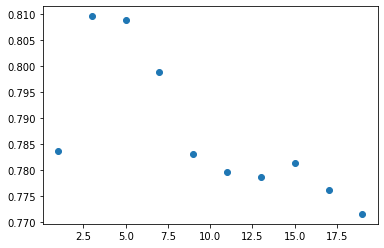

In [75]:
from matplotlib import pyplot as plt
plt.scatter(df.nums_of_neighs.astype(int),df["R^2 Coe"])

##### Selecting K-Neighbors = 3 based on the results above

In [76]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
pred_knn = sc_y.inverse_transform(pred)
y_test_knn = sc_q.inverse_transform(y_test)
metrics.r2_score(y_test_knn, pred_knn)
x_1.append(i)
y_1.append(metrics.r2_score(y_test_knn, pred_knn))

In [77]:
df_knn = pd.DataFrame({'Actual': y_test_knn.flatten(), 'Predicted': pred_knn.flatten()})
df_knn.head()

,Actual,Predicted
0,255000.0,250433.333333
1,145000.0,130166.666667
2,150500.0,162000.000000
3,412500.0,411138.333333
4,402861.0,372500.000000


In [78]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_knn, pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_knn, pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_knn, pred_knn)))
print('R-squared Error:', metrics.r2_score(y_test_knn, pred_knn))

Mean Absolute Error: 21437.700152207006
Mean Squared Error: 1198091556.402334
Root Mean Squared Error: 34613.45917995388
R-squared Error: 0.8096101374691794


## TEST.CSV WITH KNN Regression, Decision Tree Regression, and Support Vector Machine Regression

##### Data values

In [79]:
X = train_data[best_everything].values
Y = train_data["SalePrice"].values
x_test = test_data[best_everything]

##### Feature Scaling

In [80]:
sc_x = preprocessing.StandardScaler()
sc_y = preprocessing.StandardScaler()
sc_w = preprocessing.StandardScaler()
# sc_q = preprocessing.StandardScaler()

x_train = sc_x.fit_transform(X)
y_train = sc_y.fit_transform(Y.reshape(-1,1))
x_test = sc_w.fit_transform(x_test)
# y_test = sc_q.fit_transform(y_test.reshape(-1,1))

### KNN

In [81]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train, y_train)
pred = neigh.predict(x_test)
pred_knn = sc_y.inverse_transform(pred)
df_knn = pd.DataFrame(pred_knn)
df_knn.rename(columns={0: "KNN_Prediction"}).head()

,KNN_Prediction
0,122966.666667
1,153683.333333
2,181833.333333
3,189000.000000
4,198166.666667


## Decision Tree

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)
pred = dtr.predict(x_test)
pred_dtr = sc_y.inverse_transform(pred)
df_dtr = pd.DataFrame(pred_dtr)
df_dtr.rename(columns={0: "dtr_Prediction"}).head()

,dtr_Prediction
0,129000.0
1,157900.0
2,143000.0
3,181900.0
4,180000.0


## Support Vector Machine Regressor

In [83]:
from sklearn import svm
regr = svm.SVR()
regr.fit(x_train,y_train.ravel())
pred = regr.predict(x_test)
pred_svm = sc_y.inverse_transform(pred)
df_svm = pd.DataFrame(pred_svm)
df_svm.rename(columns={0: "svm_Prediction"}).head()

,svm_Prediction
0,132051.011564
1,164015.469367
2,201035.779856
3,196670.260238
4,180348.885342
